# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/


# Predefined Libraries

In [ ]:
!pip install pandas datetime datasets nltk

import numpy as np
import pandas as pd
import datetime
import datasets
from datasets import load_dataset
dataset = load_dataset("go_emotions","simplified")
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

import re
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
from sklearn.preprocessing import MultiLabelBinarizer
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-300")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


# Dataset Preparation and Preprocessing the Data


In [ ]:
data_frame = pd.concat([pd.DataFrame.from_dict(dataset['train']), pd.DataFrame.from_dict(dataset['test']), pd.DataFrame.from_dict(dataset['validation'])])

In [ ]:
emotion_map = {
    0 : "admiration",
    1 : "amusement",
    2 : "anger",
    3 : "annoyance",
    4 : "approval",
    5 : "caring",
    6 : "confusion",
    7 : "curiosity",
    8 : "desire",
    9 : "disappointment",
    10 : "disapproval",
    11 : "disgust",
    12 : "embarrassment",
    13 : "excitement",
    14 : "fear",
    15 : "gratitude",
    16 : "grief",
    17 : "joy",
    18 : "love",
    19 : "nervousness",
    20 : "optimism",
    21 : "pride",
    22 : "realization",
    23 : "relief",
    24 : "remorse",
    25 : "sadness",
    26 : "surprise",
    27 : "neutral",
}
data_frame['labels'] = data_frame['labels'].apply(lambda x: [emotion_map.get(l, 'neutral') for l in x] if isinstance(x, (list)) else original_emotion_map.get(x, 'neutral'))
data_frame.head(10)


<ipython-input-5-c6eaf7d91ba8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')


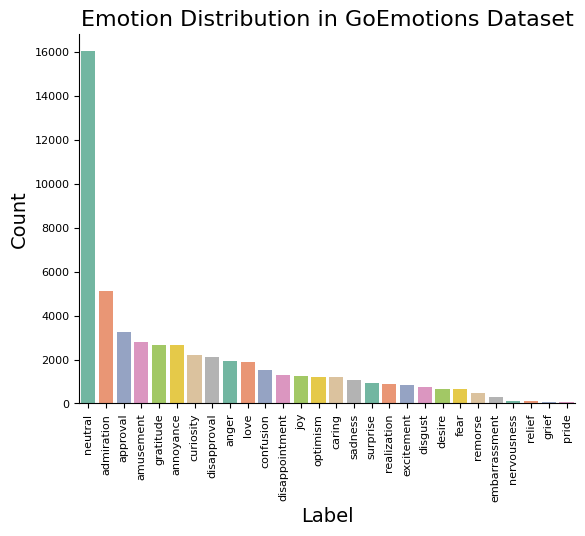

,text,labels,id
0,My favourite food is anything I didn't have to...,[neutral],eebbqej
1,"Now if he does off himself, everyone will thin...",[neutral],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[anger],eezlygj
3,To make her feel threatened,[fear],ed7ypvh
4,Dirty Southern Wankers,[annoyance],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[surprise],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[gratitude],ee3b6wu
7,We need more boards and to create a bit more s...,"[desire, optimism]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[admiration],ed8wbdn
9,It might be linked to the trust factor of your...,[neutral],eczgv1o


In [5]:
data_frame['new_labels'] = data_frame['labels'].apply(lambda x: x[0])
label_counts = data_frame['new_labels'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')
plt.title('Emotion Distribution in GoEmotions Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.despine()
plt.xticks(rotation=90)
plt.show()
data_frame = data_frame.drop('new_labels',axis=1)
data_frame.head(10)

In [6]:
emotion_dict = {
    "admiration": 0,
    "approval": 0,
    "pride": 0,
    "optimism": 0,
    "joy" : 1,
    "amusement": 1,
    "excitement": 1,
    "surprise": 1,
    "anger": 2,
    "annoyance": 2,
    "love": 3,
    "caring": 3,
    "confusion": 4,
    "realization": 4,
    "curiosity": 5,
    "desire": 6,
    "disappointment": 7,
    "sadness": 7,
    "remorse": 7,
    "disapproval": 8,
    "disgust": 8,
    "embarrassment": 9,
    "fear": 10,
    "nervousness": 10,
    "gratitude": 11,
    "relief": 11,
    "grief": 12,
    "neutral": 13
}

data_frame['labels'] = data_frame['labels'].apply(lambda x: [emotion_dict[emotion] for emotion in x])
data_frame.head(10)

,text,labels,id
0,My favourite food is anything I didn't have to...,[13],eebbqej
1,"Now if he does off himself, everyone will thin...",[13],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[10],ed7ypvh
4,Dirty Southern Wankers,[2],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[1],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[11],ee3b6wu
7,We need more boards and to create a bit more s...,"[6, 0]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn
9,It might be linked to the trust factor of your...,[13],eczgv1o


In [ ]:

data_frame['new_labels'] = data_frame['labels'].apply(lambda x: x[0])
label_counts = data_frame['new_labels'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')
plt.title('Emotion Distribution in GoEmotions Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.despine()
plt.show()
data_frame = data_frame.drop('new_labels',axis=1)
data_frame.head(10)

In [8]:

def preprocessed_text(text):
    if pd.isnull(text) :
      return ' '
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    lemmatize = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatize)
data_frame['text'] = data_frame['text'].apply(preprocessed_text)
data_frame.head(10)


,text,labels,id
0,favourite food anything didnt cook,[13],eebbqej
1,everyone think he laugh screwing people instea...,[13],ed00q6i
2,fuck bayless isoing,[2],eezlygj
3,make feel threatened,[10],ed7ypvh
4,dirty southern wanker,[2],ed0bdzj
5,omg peyton isnt good enough help u playoff dum...,[1],edvnz26
6,yes heard abt f bomb thanks reply hubby anxiou...,[11],ee3b6wu
7,need board create bit space name well good,"[6, 0]",ef4qmod
8,damn youtube outrage drama super lucrative reddit,[0],ed8wbdn
9,might linked trust factor friend,[13],eczgv1o


In [9]:
# One-hot encoding the labels
mlb = MultiLabelBinarizer()
one_hot_labels = mlb.fit_transform(data_frame['labels'])
labels_df = pd.DataFrame(one_hot_labels, columns=mlb.classes_)


# Concatenating the original DataFrame and one-hot encoded labels DataFrame
data_frame = pd.concat([data_frame.reset_index(drop=True), labels_df], axis=1)


# Dropping the original labels column
data_frame = data_frame.drop('labels', axis=1)


print(data_frame.head(10))


                                                text       id  0  1  2  3  4  \
0                 favourite food anything didnt cook  eebbqej  0  0  0  0  0   
1  everyone think he laugh screwing people instea...  ed00q6i  0  0  0  0  0   
2                                fuck bayless isoing  eezlygj  0  0  1  0  0   
3                               make feel threatened  ed7ypvh  0  0  0  0  0   
4                              dirty southern wanker  ed0bdzj  0  0  1  0  0   
5  omg peyton isnt good enough help u playoff dum...  edvnz26  0  1  0  0  0   
6  yes heard abt f bomb thanks reply hubby anxiou...  ee3b6wu  0  0  0  0  0   
7         need board create bit space name well good  ef4qmod  1  0  0  0  0   
8  damn youtube outrage drama super lucrative reddit  ed8wbdn  1  0  0  0  0   
9                   might linked trust factor friend  eczgv1o  0  0  0  0  0   

   5  6  7  8  9  10  11  12  13  
0  0  0  0  0  0   0   0   0   1  
1  0  0  0  0  0   0   0   0   1  
2  0  0  0  0 

In [10]:
def vectorize_text(text):
    vectors = []
    for token in text:
        try:
            vector = glove_model[token]
            vectors.append(vector)
        except KeyError:
            pass
    return vectors



# Apply the vectorize_text function to the text column
data_frame['vector'] = data_frame['text'].apply(lambda x: vectorize_text(x))

# Print the first 10 rows of the data frame
print(data_frame.head(10))

                                                text       id  0  1  2  3  4  \
0                 favourite food anything didnt cook  eebbqej  0  0  0  0  0   
1  everyone think he laugh screwing people instea...  ed00q6i  0  0  0  0  0   
2                                fuck bayless isoing  eezlygj  0  0  1  0  0   
3                               make feel threatened  ed7ypvh  0  0  0  0  0   
4                              dirty southern wanker  ed0bdzj  0  0  1  0  0   
5  omg peyton isnt good enough help u playoff dum...  edvnz26  0  1  0  0  0   
6  yes heard abt f bomb thanks reply hubby anxiou...  ee3b6wu  0  0  0  0  0   
7         need board create bit space name well good  ef4qmod  1  0  0  0  0   
8  damn youtube outrage drama super lucrative reddit  ed8wbdn  1  0  0  0  0   
9                   might linked trust factor friend  eczgv1o  0  0  0  0  0   

   5  6  7  8  9  10  11  12  13  \
0  0  0  0  0  0   0   0   0   1   
1  0  0  0  0  0   0   0   0   1   
2  0  0  0 

# Train- Test Split

In [11]:
X = pad_sequences(data_frame['vector'], maxlen=30, padding='post', truncating='post')
y = data_frame.iloc[:, 2:-1]

# Split the data into training and testing sets with a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:

print("Training data shape:", X_train.shape, y_train.shape)

print("Testing data shape:", X_test.shape, y_test.shape)
#print(y)

Training data shape: (43410, 30, 300) (43410, 14)
Testing data shape: (10853, 30, 300) (10853, 14)


#Model Bi-LSTM

In [ ]:

embedding_dim = 300
hidden_size = 64
sequence_length = 30
num_classes = 14
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(Bidirectional(LSTM(hidden_size, return_sequences=False), input_shape=(sequence_length, embedding_dim)))
model.add(Dropout(0.1))
model.add(Dense(130, activation='softmax'))
model.add(Dense(num_classes, activation='relu'))


model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
num_epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.2993 - loss: 0.3829 - val_accuracy: 0.3079 - val_loss: 0.3358
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.3149 - loss: 0.3329 - val_accuracy: 0.2974 - val_loss: 0.3355
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.3017 - loss: 0.3377 - val_accuracy: 0.3307 - val_loss: 0.3263
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.3295 - loss: 0.3282 - val_accuracy: 0.3379 - val_loss: 0.3253
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.3389 - loss: 0.3249 - val_accuracy: 0.3541 - val_loss: 0.3216
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.3551 - loss: 0.3186 - val_accuracy: 0.3784 - val_loss: 0.3178
Epoch 7/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - accuracy: 0.3836 - loss: 0.3173 - val_accuracy: 0.3865 - val_loss: 0.3162
Epoch 8/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.3974 - loss:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)

# Get predicted class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Get classification report
report = classification_report(y_test, y_pred_labels, zero_division=1)
print(report)

# Get accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the accuracy percentage
print("Accuracy: {:.2%}".format(accuracy))


340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4200 - loss: 0.3130
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.74      0.12      0.21      2097
           1       0.72      0.35      0.47      1297
           2       0.71      0.07      0.12       986
           3       1.00      0.00      0.00       775
           4       1.00      0.00      0.00       568
           5       1.00      0.00      0.00       520
           6       1.00      0.00      0.00       158
           7       0.73      0.15      0.25       742
           8       1.00      0.00      0.00       698
           9       1.00      0.00      0.00        76
          10       1.00      0.00      0.00       180
          11       0.98      0.68      0.80       694
          12       1.00      0.00      0.00        30
          13       0.57      0.21      0.31      3581

   micro avg       0.70      0.17      0.28     12402
   macro avg      

In [ ]:

# Get the true class labels as a 1D array
y_true = y_test.to_numpy().argmax(axis=1)

# Get the predicted class labels as a 1D array
y_pred = y_pred_labels.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[1751  100    7    0    0    0    0   13    0    0    0   72    0  154]
 [ 692  402    3    0    0    0    0    7    0    0    0   24    0   44]
 [ 748    9   65    0    0    0    0    4    0    0    0    9    0  108]
 [ 549   10    0    0    0    0    0    6    0    0    0   14    0   44]
 [ 368    6    1    0    0    0    0    7    0    0    0    6    0   69]
 [ 302    9    1    0    0    0    0    9    0    0    0    4    0   70]
 [  81    6    0    0    0    0    0    2    0    0    0    1    0   21]
 [ 441   11    3    0    0    0    0   90    0    0    0    5    0   42]
 [ 461   10    2    0    0    0    0    3    0    0    0    2    0   47]
 [  44    1    0    0    0    0    0    2    0    0    0    0    0   10]
 [ 122    4    3    0    0    0    0    0    0    0    0    0    0   19]
 [ 125   12    0    0    0    0    0    1    0    0    0  346    0    6]
 [  10    0    0    0    0    0    0    2    0    0    0    0    0    3]
 [2460   44    6    0    0    0  

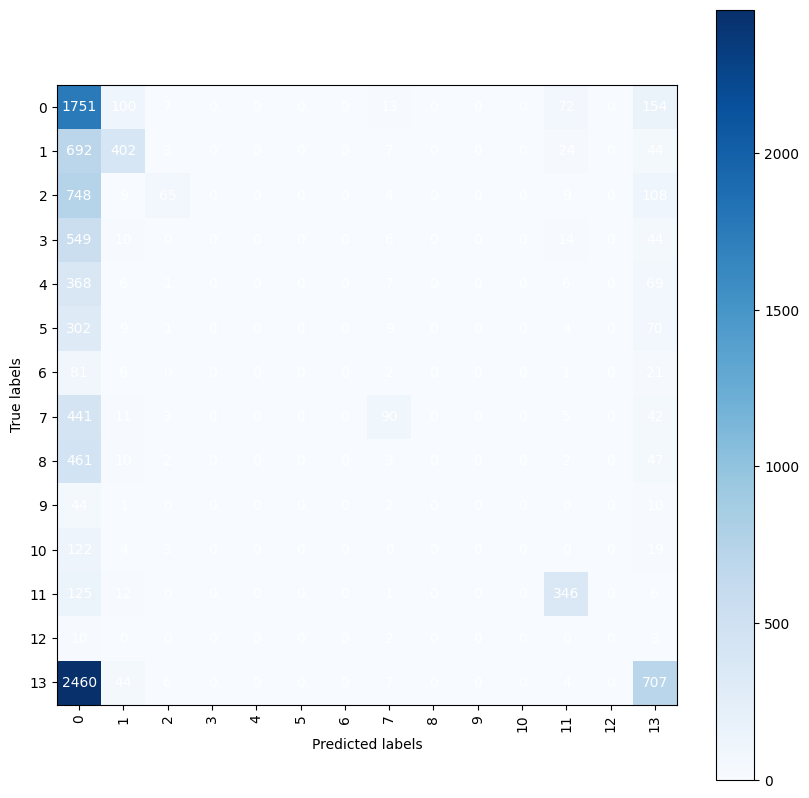

In [ ]:


# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.show()


# Model LSTM

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

embedding_dim = 300
hidden_size = 64
sequence_length = 30
num_classes = 14
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(sequence_length, embedding_dim)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='softmax'))
model.add(Dense(num_classes, activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
num_epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.2937 - loss: 9.8849 - val_accuracy: 0.2974 - val_loss: 8.9992
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.2925 - loss: 9.0114 - val_accuracy: 0.2974 - val_loss: 8.9919
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.2946 - loss: 8.9982 - val_accuracy: 0.3153 - val_loss: 8.9499
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.3202 - loss: 8.9340 - val_accuracy: 0.3378 - val_loss: 8.9137
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.3399 - loss: 8.8464 - val_accuracy: 0.3549 - val_loss: 8.8792
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.3546 - loss: 8.8347 - val_accuracy: 0.3550 - val_loss: 8.8741
Epoch 7/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.3565 - loss: 8.8184 - val_accuracy: 0.3535 - val_loss: 8.7612
Epoch 8/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.3558 - loss: 8

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)

# Get predicted class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Get classification report
report = classification_report(y_test, y_pred_labels, zero_division=1)
print(report)

# Get accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the accuracy percentage
print("Accuracy: {:.2%}".format(accuracy))


340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3661 - loss: 8.6769
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2097
           1       0.53      0.51      0.52      1297
           2       1.00      0.00      0.00       986
           3       0.74      0.48      0.58       775
           4       1.00      0.00      0.00       568
           5       1.00      0.00      0.00       520
           6       1.00      0.00      0.00       158
           7       1.00      0.00      0.00       742
           8       1.00      0.00      0.00       698
           9       1.00      0.00      0.00        76
          10       1.00      0.00      0.00       180
          11       1.00      0.00      0.00       694
          12       1.00      0.00      0.00        30
          13       0.37      0.95      0.53      3581

   micro avg       0.40      0.36      0.38     12402
   macro avg      

In [ ]:

# Get the true class labels as a 1D array
y_true = y_test.to_numpy().argmax(axis=1)

# Get the predicted class labels as a 1D array
y_pred = y_pred_labels.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[   2  196    0   79    0    0    0    0    0    0    0    0    0 1820]
 [   1  601    0   39    0    0    0    0    0    0    0    0    0  531]
 [   0   59    0   15    0    0    0    0    0    0    0    0    0  869]
 [   2   29    0  305    0    0    0    0    0    0    0    0    0  287]
 [   0   22    0    3    0    0    0    0    0    0    0    0    0  432]
 [   0   32    0    5    0    0    0    0    0    0    0    0    0  358]
 [   0   10    0    3    0    0    0    0    0    0    0    0    0   98]
 [   1   40    0    2    0    0    0    0    0    0    0    0    0  549]
 [   0   30    0    3    0    0    0    0    0    0    0    0    0  492]
 [   0    6    0    2    0    0    0    0    0    0    0    0    0   49]
 [   0   12    0    1    0    0    0    0    0    0    0    0    0  135]
 [   0   54    0    4    0    0    0    0    0    0    0    0    0  432]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0   15]
 [   0  177    0   35    0    0  

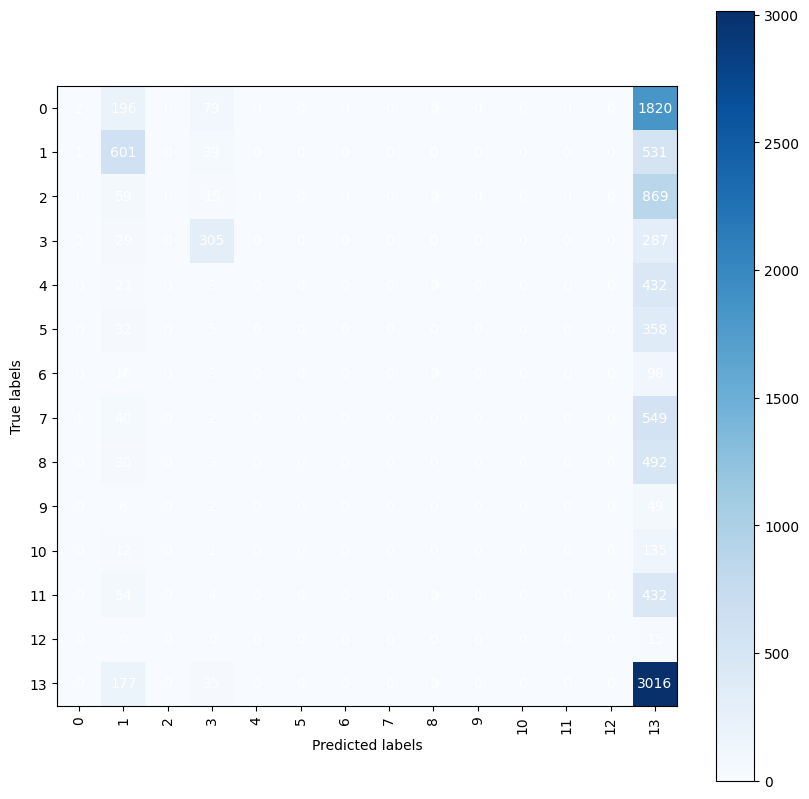

In [ ]:
# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.show()


# Model LSTM

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

embedding_dim = 300
hidden_size = 64
sequence_length = 30
num_classes = 14
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(GRU(hidden_size, input_shape=(sequence_length, embedding_dim)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='softmax'))
model.add(Dense(num_classes, activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
num_epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.2941 - loss: 7.6262 - val_accuracy: 0.3148 - val_loss: 5.4426
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.3145 - loss: 5.4603 - val_accuracy: 0.3211 - val_loss: 5.4095
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.3233 - loss: 4.9652 - val_accuracy: 0.3353 - val_loss: 4.8007
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.3405 - loss: 4.7392 - val_accuracy: 0.3424 - val_loss: 4.7717
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.3475 - loss: 4.6845 - val_accuracy: 0.3543 - val_loss: 4.7385
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3589 - loss: 4.7249 - val_accuracy: 0.3771 - val_loss: 4.7048
Epoch 7/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3791 - loss: 4.6596 - val_accuracy: 0.4073 - val_loss: 4.6594
Epoch 8/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4130 - loss: 4

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)

# Get predicted class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Get classification report
report = classification_report(y_test, y_pred_labels, zero_division=1)
print(report)

# Get accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the accuracy percentage
print("Accuracy: {:.2%}".format(accuracy))


340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4306 - loss: 4.6179
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.47      0.43      0.45      2097
           1       0.62      0.50      0.55      1297
           2       1.00      0.00      0.00       986
           3       0.73      0.51      0.60       775
           4       1.00      0.00      0.00       568
           5       1.00      0.00      0.00       520
           6       1.00      0.00      0.00       158
           7       0.53      0.23      0.32       742
           8       0.22      0.10      0.13       698
           9       1.00      0.00      0.00        76
          10       1.00      0.00      0.00       180
          11       1.00      0.00      0.00       694
          12       1.00      0.00      0.00        30
          13       0.40      0.92      0.56      3581

   micro avg       0.45      0.44      0.44     12402
   macro avg      

In [ ]:

# Get the true class labels as a 1D array
y_true = y_test.to_numpy().argmax(axis=1)

# Get the predicted class labels as a 1D array
y_pred = y_pred_labels.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[ 915  106    0   70    0    0    0   25   23    0    0    0    0  958]
 [ 146  549    0   38    0    0    0   19   17    0    0    0    0  403]
 [  92   29    0   14    0    0    0   20   55    0    0    0    0  733]
 [  74   14    0  328    0    0    0   13    7    0    0    0    0  187]
 [  49   15    0    3    0    0    0   12   30    0    0    0    0  348]
 [  46   19    0    5    0    0    0   13    6    0    0    0    0  306]
 [  23    7    0    3    0    0    0    4    1    0    0    0    0   73]
 [  60   16    0    4    0    0    0  143   20    0    0    0    0  349]
 [  66   13    0    4    0    0    0   17   52    0    0    0    0  373]
 [   4    4    0    3    0    0    0    4    1    0    0    0    0   41]
 [  17    6    0    6    0    0    0    3    8    0    0    0    0  108]
 [ 148   47    0    4    0    0    0    4    5    0    0    0    0  282]
 [   2    0    0    0    0    0    0    3    1    0    0    0    0    9]
 [ 348   99    0   44    0    0  

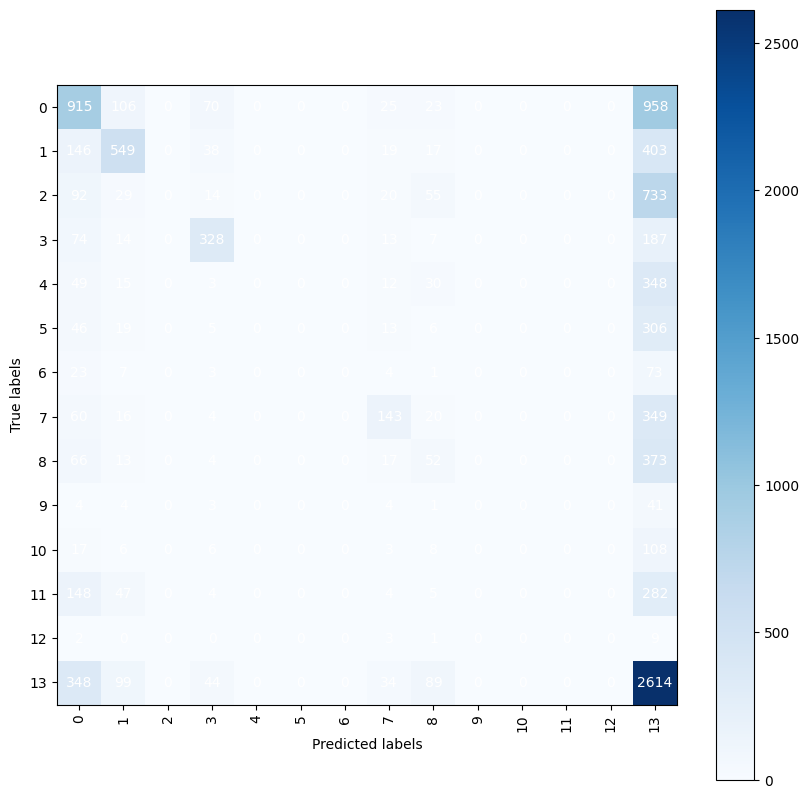

In [ ]:


# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.show()


#Model - CNN

In [13]:

embedding_dim = 300
sequence_length = 30
num_classes = 14
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(Conv1D(64, kernel_size=6, activation='relu', input_shape=(sequence_length, embedding_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Add an additional Conv1D layer with 32 filters and a kernel size of 3
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.3016 - loss: 0.2533 - val_accuracy: 0.3903 - val_loss: 0.2194
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.3978 - loss: 0.2179 - val_accuracy: 0.4352 - val_loss: 0.2114
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4334 - loss: 0.2116 - val_accuracy: 0.4447 - val_loss: 0.2061
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4430 - loss: 0.2073 - val_accuracy: 0.4531 - val_loss: 0.2049
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.4539 - loss: 0.2036 - val_accuracy: 0.4577 - val_loss: 0.2031
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4611 - loss: 0.2013 - val_accuracy: 0.4648 - val_loss: 0.2016
Epoch 7/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4732 - loss: 0.1986 - val_accuracy: 0.4682 - val_loss: 0.2002
Epoch 8/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.4812 - loss: 0.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)

# Get predicted class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Get classification report
report = classification_report(y_test, y_pred_labels, zero_division=1)
print(report)

# Get accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the accuracy percentage
print("Accuracy: {:.2%}".format(accuracy))


340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4781 - loss: 0.1987
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.73      0.28      0.41      2097
           1       0.71      0.46      0.56      1297
           2       0.74      0.07      0.12       986
           3       0.76      0.44      0.56       775
           4       0.71      0.02      0.04       568
           5       1.00      0.00      0.00       520
           6       0.76      0.14      0.24       158
           7       0.74      0.17      0.27       742
           8       0.59      0.01      0.03       698
           9       1.00      0.00      0.00        76
          10       0.79      0.06      0.11       180
          11       0.98      0.66      0.79       694
          12       1.00      0.00      0.00        30
          13       0.55      0.29      0.38      3581

   micro avg       0.68      0.27      0.38     12402
   macro avg      

In [15]:
# Get the true class labels as a 1D array
y_true = y_test.to_numpy().argmax(axis=1)

# Get the predicted class labels as a 1D array
y_pred = y_pred_labels.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[1634   89    4   55    0    0    4   10    1    0    0   43    0  257]
 [ 484  534    8   33    0    0    0    4    2    0    1   11    0   95]
 [ 681   15   65   12    1    0    0    6    2    0    0    8    0  153]
 [ 264   17    0  284    0    0    2    5    0    0    0    1    0   50]
 [ 314   11    0    3   10    0    0    6    0    0    0    4    0  109]
 [ 253   21    1    5    0    0    0    9    0    0    0    3    0  103]
 [  67    6    0    3    0    0   18    3    0    0    0    1    0   13]
 [ 390   13    4    2    0    0    1  103    0    0    2    4    0   73]
 [ 411   10    2    3    3    0    0    3   10    0    0    2    0   81]
 [  45    3    0    2    0    0    0    2    0    0    0    0    0    5]
 [ 116    6    1    1    0    0    0    1    0    0   11    0    0   12]
 [ 140   19    1    4    0    0    0    2    0    0    0  312    0   12]
 [   8    0    0    0    0    0    0    2    0    0    0    0    0    5]
 [2135   76    4   35    2    0  

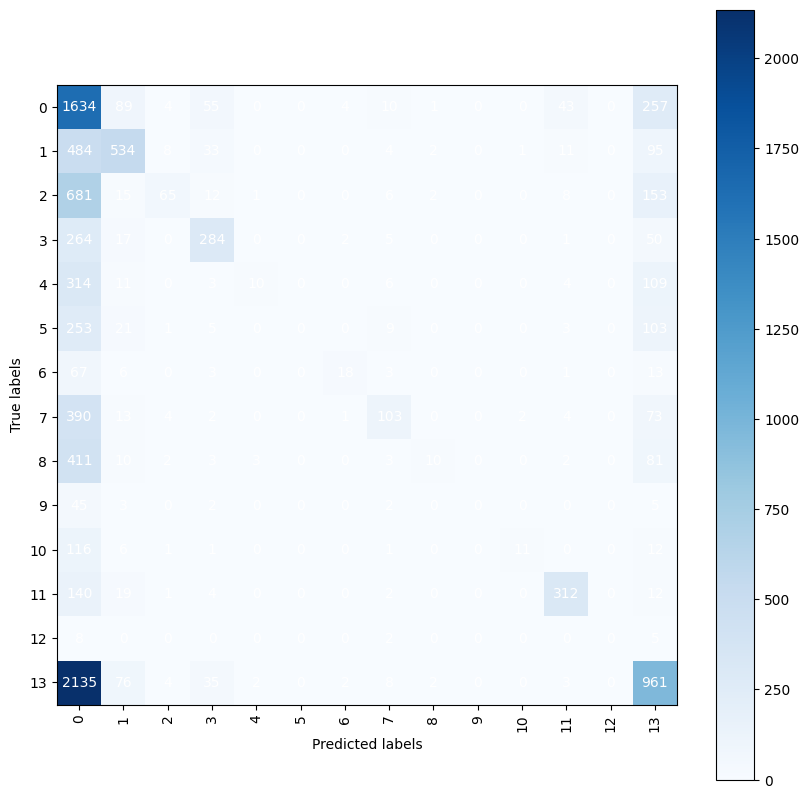

In [16]:
# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.show()

In [24]:
# Sample sentence to test
sample_sentence = "I feel so happy and excited about this event!"

# 1. Preprocess the sample sentence
processed_text = preprocessed_text(sample_sentence)
print("Processed Text:", processed_text)

# 2. Vectorize the sample sentence
sample_vector = vectorize_text(processed_text)
sample_vector = pad_sequences([sample_vector], maxlen=30, padding='post', truncating='post')
print("Vectorized Text Shape:", sample_vector.shape)

# 3. Get model prediction
y_pred_sample = model.predict(sample_vector)

# Print the raw prediction probabilities
print("Prediction Probabilities:", y_pred_sample)

# Change the threshold from 0.5 to a lower value (e.g., 0.3) to capture more emotions
y_pred_labels = (y_pred_sample > 0.3).astype(int)  # Lowering the threshold

# Display the predicted labels
predicted_emotions = mlb.inverse_transform(y_pred_labels)

# Display the predicted emotions
print("Predicted Emotions:", predicted_emotions)

emotion_dict = {
    0: "admiration",
    0: "approval",
    0: "pride",
    0: "optimism",
    1: "joy",
    1: "amusement",
    1: "excitement",
    1: "surprise",
    2: "anger",
    2: "annoyance",
    3: "love",
    3: "caring",
    4: "confusion",
    4: "realization",
    5:"curiosity",
    6:"desire",
    7:"disappointment",
    7:"sadness",
    7:"remorse",
    8:"disapproval",
    8:"disgust",
    9:"embarrassment",
    10:"fear",
    10:"nervousness",
    11:"gratitude",
    11:"relief",
    12:"grief",
    13:"neutral"
}

# Convert the predicted labels into emotion names using the emotion_map
predicted_emotion_names = [emotion_map[label] for label in predicted_emotions[0]]
print("Predicted Emotions (Named):", predicted_emotion_names)




Processed Text: feel happy excited event
Vectorized Text Shape: (1, 30, 300)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction Probabilities: [[2.2171840e-02 9.6747619e-01 7.3605734e-03 1.2647948e-03 2.1424226e-02
  8.2622347e-03 8.0575580e-03 1.5293588e-02 2.2731232e-03 1.2968919e-04
  1.0867108e-04 2.8815796e-03 5.1299412e-05 3.6257260e-02]]
Predicted Emotions: [(1,)]
Predicted Emotions (Named): ['amusement']


#Model - CNN with an additional Conv1D layer

In [ ]:

embedding_dim = 300
sequence_length = 30
num_classes = 14
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(Conv1D(64, kernel_size=6, activation='relu', input_shape=(sequence_length, embedding_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Add an additional Conv1D layer with 32 filters and a kernel size of 3
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.2968 - loss: 0.2544 - val_accuracy: 0.3879 - val_loss: 0.2196
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.4011 - loss: 0.2176 - val_accuracy: 0.4398 - val_loss: 0.2090
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4413 - loss: 0.2083 - val_accuracy: 0.4458 - val_loss: 0.2064
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.4516 - loss: 0.2054 - val_accuracy: 0.4638 - val_loss: 0.2027
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4624 - loss: 0.2029 - val_accuracy: 0.4659 - val_loss: 0.2019
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4718 - loss: 0.2001 - val_accuracy: 0.4660 - val_loss: 0.2012
Epoch 7/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4645 - loss: 0.1995 - val_accuracy: 0.4724 - val_loss: 0.2000
Epoch 8/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.4706 - loss: 0.198

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# your code here
# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)

# Get predicted class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Get classification report
report = classification_report(y_test, y_pred_labels, zero_division=1)
print(report)

# Get accuracy, precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the accuracy percentage
print("Accuracy: {:.2%}".format(accuracy))



340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4787 - loss: 0.1993
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.73      0.29      0.42      2097
           1       0.73      0.37      0.49      1297
           2       0.80      0.06      0.11       986
           3       0.75      0.41      0.53       775
           4       0.71      0.02      0.03       568
           5       1.00      0.00      0.00       520
           6       0.81      0.11      0.19       158
           7       0.71      0.16      0.27       742
           8       1.00      0.00      0.00       698
           9       1.00      0.00      0.00        76
          10       0.62      0.14      0.23       180
          11       0.97      0.65      0.78       694
          12       1.00      0.00      0.00        30
          13       0.54      0.35      0.43      3581

   micro avg       0.67      0.27      0.39     12402
   macro avg      

In [ ]:
# Get the true class labels as a 1D array
y_true = y_test.to_numpy().argmax(axis=1)

# Get the predicted class labels as a 1D array
y_pred = y_pred_labels.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[1609   63    3   52    0    0    4   14    0    0    3   42    0  307]
 [ 573  444    6   30    0    0    0    4    0    0    0   12    0  103]
 [ 642   13   59   12    1    0    1    8    0    0    2    8    0  197]
 [ 274   13    0  263    0    0    1    5    0    0    1    6    0   60]
 [ 296    7    1    3    9    0    0    7    0    0    1    4    0  129]
 [ 255    6    0    5    0    0    0    6    0    0    2    3    0  118]
 [  72    3    0    3    0    0   14    2    0    0    0    1    0   16]
 [ 376    7    1    1    1    0    1  101    0    0    2    4    0   98]
 [ 395   12    1    3    2    0    0    4    0    0    3    3    0  102]
 [  45    0    0    2    1    0    0    2    0    0    0    0    0    7]
 [ 105    3    0    1    0    0    0    0    0    0   24    0    0   15]
 [ 140   19    0    4    0    0    0    2    0    0    0  307    0   18]
 [   7    0    0    0    0    0    0    2    0    0    0    0    0    6]
 [1953   52    5   32    0    0  

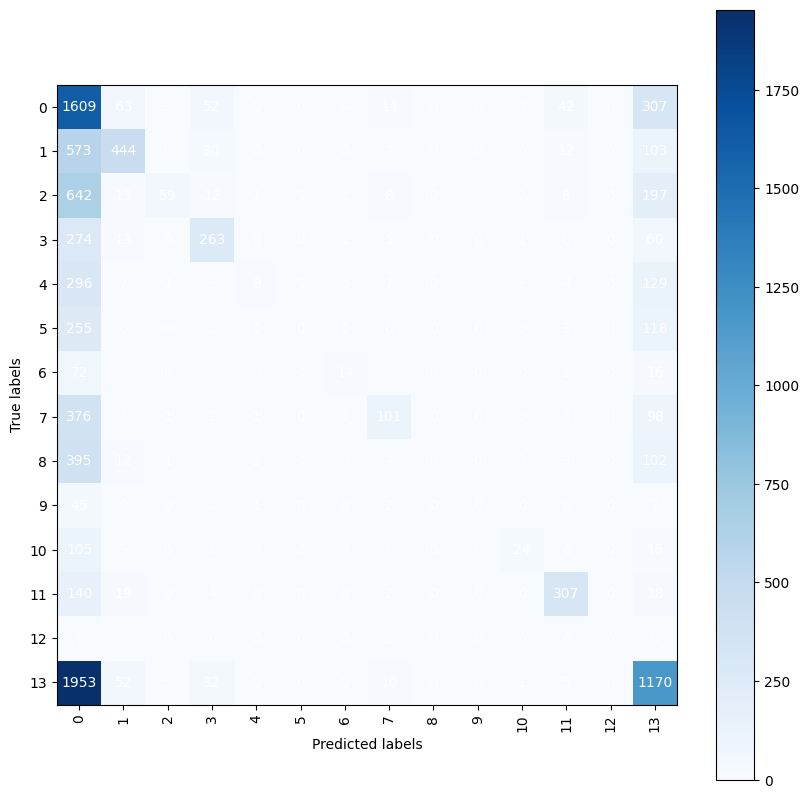

In [ ]:
# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.show()

#Model GRU